In [2]:
import os
import pickle as pkl

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
experiments_path = os.getcwd() + "/../data/explainers-output/"

In [4]:
# Figure layout
custom_params = {
    "axes.spines.right": True,
    "axes.spines.top": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "text.usetex": False,
    "text.latex.preamble": r"\usepackage[T1]{fontenc}",
}
sns.set_theme(style="ticks", rc=custom_params)

column_width = 3.25
aspect_ratio = 1.2
height = column_width / aspect_ratio

In [5]:
# Load explanation length and ranks after retraining

# Kelpie
with open(experiments_path + "len_fb15k237_complex_kelpie.pkl", "rb") as handle:
    len_kelpie = pkl.load(handle)
with open(experiments_path + "rank_fb15k237_complex_kelpie.pkl", "rb") as handle:
    rank_shift_kelpie = pkl.load(handle)
    rank_shift_kelpie = np.array(rank_shift_kelpie)

# Kelpie - K1
with open(experiments_path + "len_fb15k237_complex_k1.pkl", "rb") as handle:
    len_k1 = pkl.load(handle)
with open(experiments_path + "rank_fb15k237_complex_k1.pkl", "rb") as handle:
    rank_shift_k1 = pkl.load(handle)
    rank_shift_k1 = np.array(rank_shift_k1)

# Data Poisoning
with open(experiments_path + "len_fb15k237_complex_data_poisoning.pkl", "rb") as handle:
    len_data_poisoning = pkl.load(handle)
with open(
    experiments_path + "rank_fb15k237_complex_data_poisoning.pkl", "rb"
) as handle:
    rank_shift_data_poisoning = pkl.load(handle)
    rank_shift_data_poisoning = np.array(rank_shift_data_poisoning)

# CRIAGE
with open(experiments_path + "len_fb15k237_complex_criage.pkl", "rb") as handle:
    len_criage = pkl.load(handle)
with open(experiments_path + "rank_fb15k237_complex_criage.pkl", "rb") as handle:
    rank_shift_criage = pkl.load(handle)
    rank_shift_criage = np.array(rank_shift_criage)

# AnuBURL
with open(experiments_path + "len_fb15k237_complex_anyburl.pkl", "rb") as handle:
    len_anyburl = pkl.load(handle)
with open(experiments_path + "rank_fb15k237_complex_anyburl.pkl", "rb") as handle:
    rank_shift_anyburl = pkl.load(handle)
    rank_shift_anyburl = np.array(rank_shift_anyburl)

In [6]:
def get_avg_and_std(x):
    avg_x = np.mean(x)
    std_x = np.std(x)
    return avg_x, std_x


def get_avg(x):
    avg_x = np.mean(x)
    return avg_x

In [7]:
# Compute mean and standard deviation of length and MRR

avg_len_kelpie, std_len_kelpie = get_avg_and_std(len_kelpie)
avg_mrr_kelpie = get_avg(1 / rank_shift_kelpie[:, 1])

avg_len_k1, std_len_k1 = get_avg_and_std(len_k1)
avg_mrr_k1 = get_avg(1 / rank_shift_k1[:, 1])

avg_len_data_poisoning, std_len_data_poisoning = get_avg_and_std(len_data_poisoning)
avg_mrr_data_poisoning = get_avg(1 / rank_shift_data_poisoning[:, 1])

avg_len_criage, std_len_criage = get_avg_and_std(len_criage)
avg_mrr_criage = get_avg(1 / rank_shift_criage[:, 1])

avg_len_anyburl, std_len_anyburl = get_avg_and_std(len_criage)
avg_mrr_anyburl = get_avg(1 / rank_shift_anyburl[:, 1])

In [8]:
print(f"{'Algorithm':<20} {'Avg Length':<15} {'Std Length':<15} {'Avg MRR':<15}")
print("=" * 70)
print(
    f"{'Kelpie':<20} {avg_len_kelpie:<15.3f} {std_len_kelpie:<15.3f} {avg_mrr_kelpie:<15.3f}"
)
print(f"{'K1':<20} {avg_len_k1:<15.3f} {std_len_k1:<15.3f} {avg_mrr_k1:<15.3f}")
print(
    f"{'Data Poisoning':<20} {avg_len_data_poisoning:<15.3f} {std_len_data_poisoning:<15.3f} {avg_mrr_data_poisoning:<15.3f}"
)
print(
    f"{'CRIAGE':<20} {avg_len_criage:<15.3f} {std_len_criage:<15.3f} {avg_mrr_criage:<15.3f}"
)
print(
    f"{'AnyBURL':<20} {avg_len_anyburl:<15.3f} {std_len_anyburl:<15.3f} {avg_mrr_anyburl:<15.3f}"
)

Algorithm            Avg Length      Std Length      Avg MRR        
Kelpie               3.920           0.337           0.821          
K1                   1.000           0.000           0.882          
Data Poisoning       1.000           0.000           0.890          
CRIAGE               1.000           0.000           0.973          
AnyBURL              1.000           0.000           0.927          


In [9]:
def compute_non_one_number(array):
    return np.sum(array != 1) / len(array) * 50

In [10]:
# Compute MRR != 1

non_one = {
    "Kelpie": compute_non_one_number(1 / rank_shift_kelpie[:, 1]),
    "K1": compute_non_one_number(1 / rank_shift_k1[:, 1]),
    "Data Poisoning": compute_non_one_number(1 / rank_shift_data_poisoning[:, 1]),
    "CRIAGE": compute_non_one_number(1 / rank_shift_criage[:, 1]),
    "AnyBURL": compute_non_one_number(1 / rank_shift_anyburl[:, 1]),
}

In [11]:
def compute_all_one_number(*ranks_all_methods):
    ranks_all_methods_combined = np.array(ranks_all_methods).T
    return np.sum(np.all(ranks_all_methods_combined == 1, axis=1))


total_all_one = compute_all_one_number(
    1 / rank_shift_kelpie[:, 1],
    1 / rank_shift_k1[:, 1],
    1 / rank_shift_data_poisoning[:, 1],
    1 / rank_shift_criage[:, 1],
    1 / rank_shift_anyburl[:, 1],
)

In [12]:
print(f"{'Algorithm':<20} {'N (out of 50)':<15} {'%':<15}")
print("=" * 45)
for method, fraction in non_one.items():
    percentage = (fraction / 50) * 100
    print(f"{method:<20} {fraction:<15.0f} {percentage:<15.0f}")
print(
    "Expl. across alg.   ",
    f"{50 - total_all_one:<15.0f} {100 - total_all_one / 50 * 100:<15.0f}",
)

Algorithm            N (out of 50)   %              
Kelpie               14              28             
K1                   11              22             
Data Poisoning       10              20             
CRIAGE               2               4              
AnyBURL              7               14             
Expl. across alg.    18              36             


In [13]:
# Compute Hits@1


def compute_hits_at_1_stats(ranks):
    hits_at_1 = (ranks == 1).astype(int)
    avg_hits_at_1 = np.mean(hits_at_1)
    return avg_hits_at_1


avg_hits_kelpie = compute_hits_at_1_stats(rank_shift_kelpie[:, 1])
avg_hits_k1 = compute_hits_at_1_stats(rank_shift_k1[:, 1])
avg_hits_data_poisoning = compute_hits_at_1_stats(rank_shift_data_poisoning[:, 1])
avg_hits_criage = compute_hits_at_1_stats(rank_shift_criage[:, 1])
avg_hits_anyburl = compute_hits_at_1_stats(rank_shift_anyburl[:, 1])

In [14]:
print(f"{'Algorithm':<20} {'Avg Hits@1':<15}")
print("=" * 35)
print(f"{'Kelpie':<20} {avg_hits_kelpie:<15.3f}")
print(f"{'K1':<20} {avg_hits_k1:<15.3f}")
print(f"{'Data Poisoning':<20} {avg_hits_data_poisoning:<15.3f}")
print(f"{'CRIAGE':<20} {avg_hits_criage:<15.3f}")
print(f"{'AnyBURL':<20} {avg_hits_anyburl:<15.3f}")

Algorithm            Avg Hits@1     
Kelpie               0.720          
K1                   0.780          
Data Poisoning       0.800          
CRIAGE               0.960          
AnyBURL              0.860          


In [15]:
def lighten_color(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys

    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

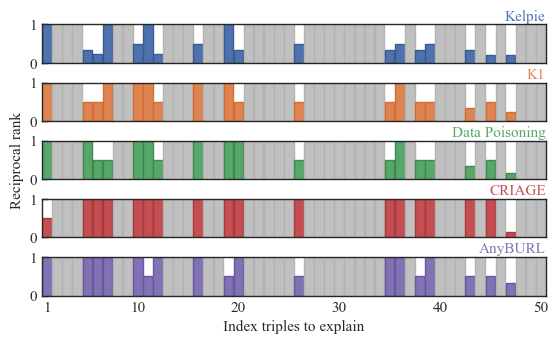

In [16]:
# Plot barplot MRR != 1 for triples to explain

fig, ax = plt.subplots(5, 1, figsize=(2 * column_width, 1.3 * height), sharex=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

x_axis = np.arange(1, len(rank_shift_kelpie[:, 1]) + 1)
bar_width = 0.96

argsort_kelpie = np.argsort(rank_shift_kelpie)

datasets = [
    rank_shift_kelpie,
    rank_shift_k1,
    rank_shift_data_poisoning,
    rank_shift_criage,
    rank_shift_anyburl,
]

colors = ["C0", "C1", "C2", "C3", "C4"]
method_names = ["Kelpie", "K1", "Data Poisoning", "CRIAGE", "AnyBURL"]

for i in range(5):
    y_values = 1 / datasets[i][:, 1]
    bar_colors = []
    for j, x in enumerate(x_axis):
        all_ones = all(1 / datasets[k][:, 1][j] == 1 for k in range(5))
        if all_ones:
            bar_colors.append("silver")
        else:
            bar_colors.append(colors[i])

    edge_colors = [lighten_color(c, 1.2) for c in bar_colors]
    ax[i].bar(
        x_axis, y_values, color=bar_colors, width=bar_width, edgecolor=edge_colors
    )

    ax[i].set_xlim(0.5, 50.5)
    ax[i].set_ylim(0, 1)
    ax[i].set_xticks([1, 10, 20, 30, 40, 50])

    if i == 2:
        ax[i].set_ylabel("Reciprocal rank", size=11)

    ax[i].tick_params(axis="both", width=1, direction="in", length=4)

    ax[i].text(
        1,
        1.2,
        method_names[i],
        rotation=0,
        size=11,
        ha="right",
        va="center",
        transform=ax[i].transAxes,
        color=colors[i],
    )

    for spine in ax[i].spines.values():
        spine.set_linewidth(1)

plt.xlabel("Average explanation length", size=11)
plt.xlabel("Index triples to explain", size=11)

plt.savefig("../figures/barplot-MRR.pdf", bbox_inches="tight", pad_inches=0)
plt.show()

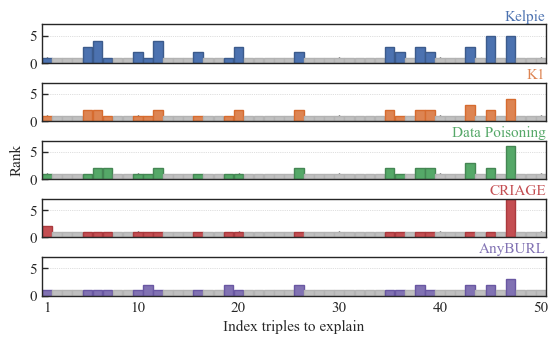

In [17]:
# Plot barplot Ranks != 1 for triples to explain

fig, ax = plt.subplots(5, 1, figsize=(2 * column_width, 1.3 * height), sharex=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

x_axis = np.arange(1, len(rank_shift_kelpie[:, 1]) + 1)
bar_width = 0.96

argsort_kelpie = np.argsort(rank_shift_kelpie)

datasets = [
    rank_shift_kelpie,
    rank_shift_k1,
    rank_shift_data_poisoning,
    rank_shift_criage,
    rank_shift_anyburl,
]

colors = ["C0", "C1", "C2", "C3", "C4"]
method_names = ["Kelpie", "K1", "Data Poisoning", "CRIAGE", "AnyBURL"]

for i in range(5):
    y_values = datasets[i][:, 1]
    bar_colors = []
    for j, x in enumerate(x_axis):
        all_ones = all(1 / datasets[k][:, 1][j] == 1 for k in range(5))
        if all_ones:
            bar_colors.append("silver")
        else:
            bar_colors.append(colors[i])

    edge_colors = [lighten_color(c, 1.2) for c in bar_colors]
    ax[i].bar(
        x_axis, y_values, color=bar_colors, width=bar_width, edgecolor=edge_colors
    )

    ax[i].set_xlim(0.5, 50.5)
    ax[i].set_ylim(0, 7)
    ax[i].set_xticks([1, 10, 20, 30, 40, 50])

    if i == 2:
        ax[i].set_ylabel("Rank", size=11)

    ax[i].tick_params(axis="both", width=1, direction="in", length=4)

    ax[i].text(
        1,
        1.2,
        method_names[i],
        rotation=0,
        size=11,
        ha="right",
        va="center",
        transform=ax[i].transAxes,
        color=colors[i],
    )

    for spine in ax[i].spines.values():
        spine.set_linewidth(1)

    ax[i].grid(
        True, which="both", axis="y", color="silver", linestyle=":", linewidth=0.5
    )

plt.xlabel("Average explanation length", size=11)
plt.xlabel("Index triples to explain", size=11)

plt.savefig("../figures/barplot-MR.pdf", bbox_inches="tight", pad_inches=0)
plt.show()

In [18]:
avg_len_kelpie, std_len_kelpie = get_avg_and_std(np.array(len_kelpie))
avg_rank_kelpie, std_rank_kelpie = get_avg_and_std(rank_shift_kelpie[:, 1])

avg_len_k1, std_len_k1 = get_avg_and_std(len_k1)
avg_rank_k1, std_rank_k1 = get_avg_and_std(rank_shift_k1[:, 1])

avg_len_data_poisoning, std_len_data_poisoning = get_avg_and_std(len_data_poisoning)
avg_rank_data_poisoning, std_rank_data_poisoning = get_avg_and_std(
    rank_shift_data_poisoning[:, 1]
)

avg_len_criage, std_len_criage = get_avg_and_std(len_criage)
avg_rank_criage, std_rank_criage = get_avg_and_std(rank_shift_criage[:, 1])

avg_len_anyburl, std_len_anyburl = get_avg_and_std(len_criage)
avg_rank_anyburl, std_rank_anyburl = get_avg_and_std(rank_shift_anyburl[:, 1])

In [19]:
print(
    f"{'Algorithm':<20} {'Avg Length':<15} {'Std Length':<15} {'Avg Rank':<15} {'Std Rank':<15}"
)
print("=" * 80)
print(
    f"{'Kelpie':<20} {avg_len_kelpie:<15.3f} {std_len_kelpie:<15.3f} {avg_rank_kelpie:<15.3f} {std_rank_kelpie:<15.3f}"
)
print(
    f"{'K1':<20} {avg_len_k1:<15.3f} {std_len_k1:<15.3f} {avg_rank_k1:<15.3f} {std_rank_k1:<15.3f}"
)
print(
    f"{'Data Poisoning':<20} {avg_len_data_poisoning:<15.3f} {std_len_data_poisoning:<15.3f} {avg_rank_data_poisoning:<15.3f} {std_rank_data_poisoning:<15.3f}"
)
print(
    f"{'CRIAGE':<20} {avg_len_criage:<15.3f} {std_len_criage:<15.3f} {avg_rank_criage:<15.3f} {std_rank_criage:<15.3f}"
)
print(
    f"{'AnyBURL':<20} {avg_len_anyburl:<15.3f} {std_len_anyburl:<15.3f} {avg_rank_anyburl:<15.3f} {std_rank_anyburl:<15.3f}"
)

Algorithm            Avg Length      Std Length      Avg Rank        Std Rank       
Kelpie               3.920           0.337           1.580           1.079          
K1                   1.000           0.000           1.280           0.601          
Data Poisoning       1.000           0.000           1.300           0.806          
CRIAGE               1.000           0.000           1.140           0.849          
AnyBURL              1.000           0.000           1.160           0.418          
